# Решение краевой задачи методом прогонки, вариант №16
Необходимо решить уравнение с кусочно-непрерывными коэффициентами.
$$
\begin{cases} 
\frac{d}{dx}[k(x)\frac{du}{dx}] - q(x)u = -f(x), \\
u(0) = u^0, \\
u(1) = u^1, \\
\end{cases} 
$$

В данной задаче коэффициенты имеют одну точку разрыва 1 рода 
в координате $x_0 = \frac{1}{\sqrt{3}}$. В данной точке ставятся условия сопряжения:

$$
\begin{cases}
u |_{x = x_0 - 0} = u |_{x = x_0 + 0}, \\
ku_x |_{x = x_0 - 0} = ku_x |_{x = x_0 + 0}. 
\end{cases}
$$



Подключаем нужные библиотеки

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

Задаем функцию для k

In [2]:
def k(x):
    return math.exp(-x)

Задаем функцию q(x)

In [3]:
def q(x, x0):
    if (x < x0):
        return x**3
    else:
        return x

 Задаем функцию f(x)

In [4]:
def f(x, x0):
    if (x < x0):
        return x**2 - 1
    else:
        return 1

Задаем начальные условия

In [5]:
x_start = 0
x_end = 1

u_0 = 2
u_L = 1

num = 100000 # change L to num
h = (x_end - x_start) / (num - 1)

x = np.linspace(x_start, x_end, num)

u = np.zeros(num)

u[0] = u_0
u[-1] = u_L

x0 = 1 / np.sqrt(3)

Используем метод встречных прогонок

Пусть точка разрыва между узлами l_a и  l_b. Введем обозначение:

$(k_\alpha)_{l \pm 1/2} = k_\alpha(x_l \pm h/2)$

$(k_\beta)_{l \pm 1/2} = k_\beta(x_l \pm h/2)$

Прямая прогонка:

\begin{cases}
u_{l_\alpha} = u_{l_\beta} = \displaystyle\frac{(k_\alpha)_{l_\alpha}\beta_{l_\alpha - 1} + (k_\beta)_{l_\beta}\beta_{l_\beta + 1}}{(k_\alpha)_{l_\alpha}(1 - \alpha_{l_\alpha - 1}) + (k_\beta)_{l_\beta} (1 - \alpha_{l_\beta + 1})} \\
u_{l_\alpha - 1} = \alpha_{l_\alpha - 1} u_{l_\alpha} + \beta_{l_\alpha - 1} \\
u_{l_\beta + 1} = \alpha_{l_\beta + 1} u_{l_\beta} + \beta_{l_\beta + 1}
\end{cases}

При обратной прогонке по формулам 
$$
\begin{cases}
u_{l - 1} = \alpha_{l - 1} u_l + \beta_{l - 1}, \;\;\; l = \overline{1 \div l_\alpha - 1} \\
u_{l + 1} = \alpha_{l + 1} u_l + \beta_{l + 1}, \;\;\; l = \overline{L - 1 \div l_\beta + 1}
\end{cases}
$$

находим решение в узлах сетки, получая, таким образом, численое решение задачи.

Найдем индексы окружающие точку разрыва

In [6]:
l_a = int(np.floor(x0 / h))
l_b = l_a + 1

Посчитаем коэффициенты нужные для уравнений

In [7]:
a = np.zeros(num)
b = np.zeros(num)
c = np.zeros(num)
d = np.zeros(num)

alpha = np.zeros(num)
beta  = np.zeros(num)

Начнем прямую прогонку

In [8]:
for l in range(1, l_a):
    l_more = l + 0.5
    l_less = l - 0.5
    a[l] = k(l_more * h)
    b[l] = -(k(l_more * h) + k(l_less * h) + q(l * h, x0) * h * h)
    c[l] = k(l_less * h)
    d[l] = -f(l * h, x0) * h * h

for l in range(l_b + 1, num - 1):
    l_more = l + 0.5
    l_less = l - 0.5
    a[l] = k(l_more * h)
    b[l] = -(k(l_more * h) + k(l_less * h) + q(l * h, x0) * h * h)
    c[l] = k(l_less * h)
    d[l] = -f(l * h, x0) * h * h

Посчитаем прогоночные коэффициенты в первой и последней точках

In [9]:
alpha[1] = -a[1] / b[1]
beta[1]  = (d[1] - c[1] * u_0) / b[1]

alpha[num - 2] = -c[num - 2] / b[num - 2]
beta[num - 2]  = (d[num - 2] - c[num - 2] * u_L) / b[num - 2]

Посчитаем $\alpha$ и $\beta$ 

In [10]:
for l in range(2, l_a):
    alpha[l] = -a[l] / (b[l] + c[l] * alpha[l - 1])
    beta[l]  = (d[l] - c[l] * beta[l - 1]) / (b[l] + c[l] * alpha[l - 1])


for l in range(num - 3, l_b, -1):
    alpha[l] = -c[l] / (b[l] + a[l] * alpha[l + 1])
    beta[l]  = (d[l] - a[l] * beta[l + 1]) / (b[l] + a[l] * alpha[l + 1])

Посчитаем результат решения системы для индексов $l_{\alpha-1}, l_{\alpha}, l_{\beta}, l_{\beta+1}$

In [11]:
u[l_a] = (k(l_a * h) * beta[l_a - 1] + k(l_b * h) * beta[l_b + 1]) / (k(l_a * h) * (1 - alpha[l_a - 1]) + k(l_b * h) * (1 - alpha[l_b + 1]))
u[l_b] = u[l_a].copy()

u[l_a - 1] = alpha[l_a - 1] * u[l_a] + beta[l_a - 1]
u[l_b + 1] = alpha[l_b + 1] * u[l_b] + beta[l_b + 1]

Начнем обратную прогонку

In [12]:
for l in range(l_a - 1, 0, -1):
    u[l] = alpha[l] * u[l + 1] + beta[l]

for l in range(l_b + 1, num - 1):
    u[l] = alpha[l] * u[l - 1] + beta[l]

Выведем график

<function matplotlib.pyplot.show(close=None, block=None)>

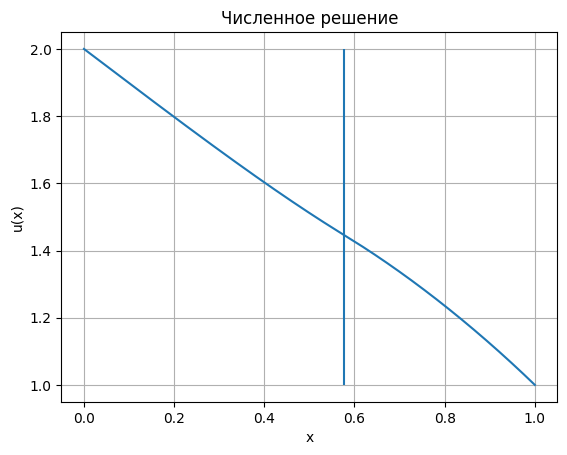

In [13]:
plt.plot(x, u)
plt.title("Численное решение")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid()

plt.vlines(x0, min(u), max(u))

plt.show